In [ ]:
# Classical array manipulation
import numpy as np

# Image manipulation | OpenCV
import cv2

# Showing images and evaluating model results
import matplotlib.pyplot as plt

# VGG19 Model
from keras.applications.vgg19 import VGG19

# Preparing VGG19 Model
from keras.layers import Dense,Flatten,Input
from keras.models import Sequential

# One hot label encoding
from keras.utils import to_categorical

# CIFAR10 dataset
from keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print("Shape of x_train is ",x_train.shape)
print("Shape of y_train is ",y_train.shape)
print("Shape of x_test  is ",x_test.shape)
print("Shape of y_test  is",y_test.shape)

Shape of x_train is  (50000, 32, 32, 3)
Shape of y_train is  (50000, 1)
Shape of x_test  is  (10000, 32, 32, 3)
Shape of y_test  is (10000, 1)


In [ ]:
def resize_img(img):
    numberOfImage = img.shape[0]
    new_array = np.zeros((numberOfImage, 48,48,3))
    for i in range(numberOfImage):
        new_array[i] = cv2.resize(img[i,:,:,:],(48,48))
    return new_array

In [ ]:
x_train = resize_img(x_train)
x_test = resize_img(x_test)
print("New shape of x_train is ",x_train.shape)
print("New shape of x_test  is ",x_test.shape)

New shape of x_train is  (50000, 48, 48, 3)
New shape of x_test  is  (10000, 48, 48, 3)


In [ ]:
# one hot encoding
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

print("New shape of y_train is ",y_train.shape)
print("New shape of y_test  is ",y_test.shape)

New shape of y_train is  (50000, 10)
New shape of y_test  is  (10000, 10)


In [ ]:
# Include top = add fully connected layers to layer.
# Weights = use pretrained weights (trained in imagenet)
vgg = VGG19(include_top=False,weights="imagenet",input_shape=(48,48,3))

vgg.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()

# Adding layers to the blank model
for layer in vgg.layers:
    model.add(layer)

# Don't train layers again, because they are already trained
for layer in model.layers:
    layer.trainable = False

# Adding fully connected layers
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10,activation="softmax"))

# Checking model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,091,338 (76.64 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
# However before this, we need to compile the model
model.compile(optimizer="RMSprop",loss="categorical_crossentropy",metrics=["accuracy"])

# Let's train.
hist = model.fit(x_train,y_train,validation_split=0.15,epochs=30,batch_size=1000)

# We use %15 of the train set as validation set.

Epoch 1/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 47s 619ms/step - accuracy: 0.3173 - loss: 14.2170 - val_accuracy: 0.4764 - val_loss: 5.3479
Epoch 2/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 49s 299ms/step - accuracy: 0.4907 - loss: 4.8279 - val_accuracy: 0.5199 - val_loss: 3.9183
Epoch 3/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - accuracy: 0.5276 - loss: 3.6507 - val_accuracy: 0.5231 - val_loss: 3.3778
Epoch 4/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 323ms/step - accuracy: 0.5153 - loss: 3.4089 - val_accuracy: 0.5451 - val_loss: 2.6720
Epoch 5/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - accuracy: 0.5240 - loss: 3.0386 - val_accuracy: 0.5139 - val_loss: 2.9340
Epoch 6/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - accuracy: 0.5310 - loss: 2.8056 - val_accuracy: 0.5151 - val_loss: 2.6084
Epoch 7/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 328ms/step - accuracy: 0.5218 - loss: 2.7830 - val_accuracy: 0.5203 - val_loss: 3.0482
Epoch 8/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 334ms/step - accuracy: 0.5257 - loss: 2.6824 - val_acc

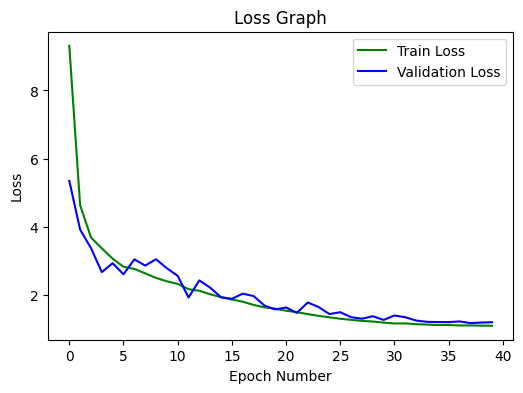

In [ ]:
plt.subplots(figsize=(6,4))
plt.plot(hist.epoch,hist.history["loss"],color="green",label="Train Loss")
plt.plot(hist.epoch,hist.history["val_loss"],color="blue",label="Validation Loss")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Graph")
plt.show()

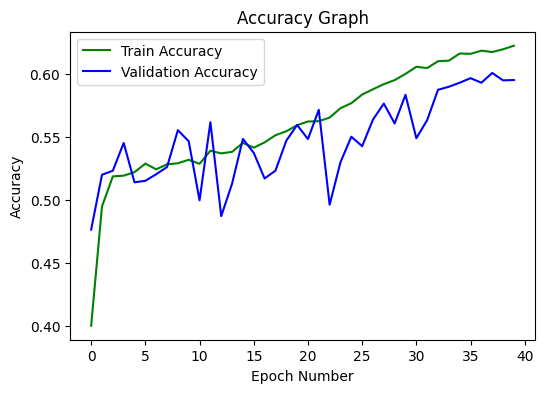

In [ ]:
plt.subplots(figsize=(6,4))
plt.plot(hist.epoch,hist.history["accuracy"],color="green",label="Train Accuracy")
plt.plot(hist.epoch,hist.history["val_accuracy"],color="blue",label="Validation Accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Graph")
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5949 - loss: 1.2063


[1.2080436944961548, 0.5921000242233276]

In [ ]:
import numpy as np
import tensorflow as tf

# Instead of predict_classes, use model.predict followed by np.argmax
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1) # Get the class with the highest probability

conf_matrix = confusion_matrix(y_pred=y_pred,y_true=[np.where(r==1)[0][0] for r in y_test])


plt.subplots(figsize=(7,7))
sns.heatmap(conf_matrix,annot=True,linewidths=1.5,fmt=".1f",cmap="RdYlGn")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


NameError: name 'confusion_matrix' is not defined